In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## 1. 读取图片

In [2]:
image_raw_data = tf.gfile.FastGFile('dataset/cat.jpg').read()
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    print(img_data.eval())
    img_data.set_shape([1797, 2673, 3])
    print img_data.get_shape()

Instructions for updating:
Use tf.gfile.GFile.
[[[162 161 140]
  [162 162 138]
  [161 161 137]
  ...
  [106 140  46]
  [101 137  47]
  [102 141  52]]

 [[164 162 139]
  [163 161 136]
  [163 161 138]
  ...
  [104 138  43]
  [102 139  46]
  [108 138  50]]

 [[165 163 140]
  [165 163 138]
  [163 161 136]
  ...
  [104 135  41]
  [102 137  43]
  [108 139  45]]

 ...

 [[207 200 181]
  [206 199 180]
  [206 199 180]
  ...
  [109  84  53]
  [107  84  53]
  [106  81  50]]

 [[205 200 180]
  [205 200 180]
  [206 199 180]
  ...
  [106  83  49]
  [105  82  51]
  [106  81  50]]

 [[205 200 180]
  [205 198 179]
  [205 198 179]
  ...
  [108  86  49]
  [105  82  48]
  [104  81  49]]]
(1797, 2673, 3)


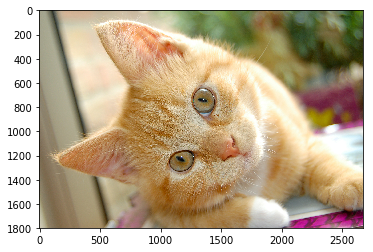

In [3]:
with tf.Session() as sess:
    plt.imshow(img_data.eval())
    plt.show()

## 2. 打印图片

In [4]:
with tf.Session() as sess:
    encoded_image = tf.image.encode_jpeg(img_data)
    with tf.gfile.GFile('dataset/cat_encoded.jpg', 'wb') as f:
        f.write(encoded_image.eval())

## 3. 重新调整图片大小

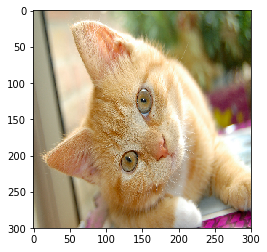

In [5]:
with tf.Session() as sess:
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    resized = tf.image.resize_images(image_float, [300,300], method=0)
    plt.imshow(resized.eval())
    plt.show()

## 4. 裁剪和填充图片

Instructions for updating:
Colocations handled automatically by placer.


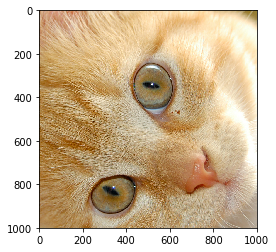

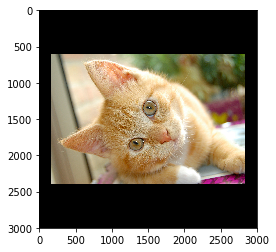

In [6]:
with tf.Session() as sess:
    croped = tf.image.resize_image_with_crop_or_pad(img_data, 1000, 1000)
    padded = tf.image.resize_image_with_crop_or_pad(img_data, 3000, 3000)
    plt.imshow(croped.eval())
    plt.show()
    plt.imshow(padded.eval())
    plt.show()

## 5. 截取中间50%的图片

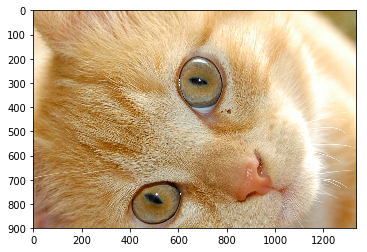

In [7]:
with tf.Session() as sess:
    central_croped = tf.image.central_crop(img_data, 0.5)
    plt.imshow(central_croped.eval())
    plt.show()

## 6. 翻转图片

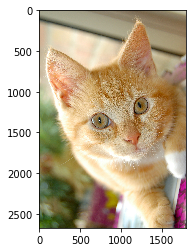

In [8]:
with tf.Session() as sess: 
    # 上下翻转
    #flipped1 = tf.image.flip_up_down(img_data)
    # 左右翻转
    # flipped2 = tf.image.flip_left_right(img_data)
    
    #对角线翻转
    transposed = tf.image.transpose_image(img_data)
    plt.imshow(transposed.eval())
    plt.show()
    
    # 以一定概率上下翻转图片。
    #flipped = tf.image.random_flip_up_down(img_data)
    # 以一定概率左右翻转图片。
    #flipped = tf.image.random_flip_left_right(img_data)

## 7. 图片色彩调整

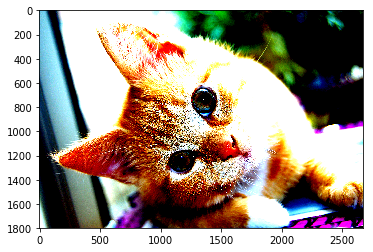

In [9]:
with tf.Session() as sess:
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    # 亮度 +0.5
    #adjusted = tf.image.adjust_brightness(image_float, 0.5)    
    # 亮度 -0.5
    #adjusted = tf.image.adjust_brightness(image_float, -0.5)
    
    # 在[-max_delta, max_delta)的范围随机调整图片的亮度。
    #adjusted = tf.image.random_brightness(image_float, max_delta=0.5)
    
    # 将图片的对比度-5
    #adjusted = tf.image.adjust_contrast(image_float, -5)
    
    # 将图片的对比度+5
    adjusted = tf.image.adjust_contrast(image_float, 5)
    
    # 在[lower, upper]的范围随机调整图的对比度。
    #adjusted = tf.image.random_contrast(image_float, lower, upper)
    
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.imshow(adjusted.eval())
    plt.show()

## 8. 添加色相和饱和度

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


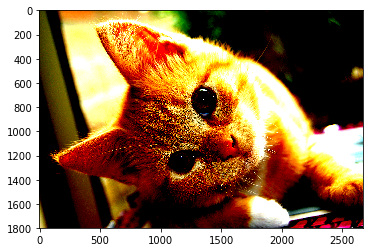

In [10]:
with tf.Session() as sess:    
    # 在进行一系列图片调整前，先将图片转换为实数形式，有利于保持计算精度。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    
    #adjusted = tf.image.adjust_hue(image_float, 0.1)
    #adjusted = tf.image.adjust_hue(image_float, 0.3)
    #adjusted = tf.image.adjust_hue(image_float, 0.5)

    # 在[-max_delta, max_delta]的范围随机调整图片的色相。max_delta的取值在[0, 0.5]之间。
    #max_delta = 0.3
    #adjusted = tf.image.random_hue(image_float, max_delta)
    
    # 将图片的饱和度-5。
    # adjusted = tf.image.adjust_saturation(image_float, -5)
    # 将图片的饱和度+5。
    # adjusted = tf.image.adjust_saturation(image_float, 5)
    # 在[lower, upper]的范围随机调整图的饱和度。
    #adjusted = tf.image.random_saturation(image_float, lower, upper)
    
    # 将代表一张图片的三维矩阵中的数字均值变为0，方差变为1。
    adjusted = tf.image.per_image_standardization(image_float)
    
    # 在最终输出前，将实数取值截取到0-1范围内。
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.imshow(adjusted.eval())
    plt.show()

## 9. 添加标注框并裁减

Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


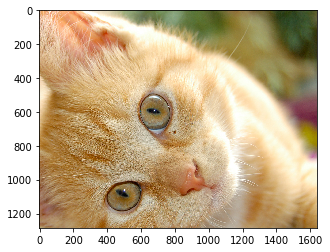

[[[0.05731775 0.23381968 0.7173066  0.7018331 ]]]


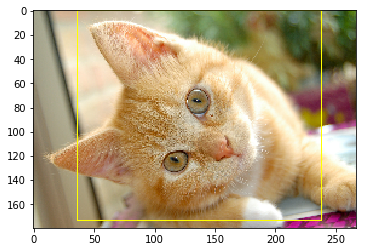

In [11]:
with tf.Session() as sess:         
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])
    
    # sample_distorted_bounding_box要求输入图片必须是实数类型。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    
    begin, size, bbox_for_draw = tf.image.sample_distorted_bounding_box(
        tf.shape(image_float), bounding_boxes=boxes, min_object_covered=0.4)
    
    # 截取后的图片
    distorted_image = tf.slice(image_float, begin, size)
    plt.imshow(distorted_image.eval())
    plt.show()

    # 在原图上用标注框画出截取的范围。由于原图的分辨率较大（2673x1797)，生成的标注框 
    # 在Jupyter Notebook上通常因边框过细而无法分辨，这里为了演示方便先缩小分辨率。
    image_small = tf.image.resize_images(image_float, [180, 267], method=0)
    batchced_img = tf.expand_dims(image_small, 0)
    image_with_box = tf.image.draw_bounding_boxes(batchced_img, bbox_for_draw)
    print(bbox_for_draw.eval())
    plt.imshow(image_with_box[0].eval())
    plt.show()

## 10. 完整样例

In [12]:
# 1. 随机调整图片的色彩，定义两种顺序。
def distort_color(image, color_ordering=0):
    if color_ordering == 0:
        image = tf.image.random_brightness(image, max_delta=32./255.)
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        image = tf.image.random_hue(image, max_delta=0.2)
        image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    else:
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        image = tf.image.random_brightness(image, max_delta=32./255.)
        image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
        image = tf.image.random_hue(image, max_delta=0.2)

    return tf.clip_by_value(image, 0.0, 1.0)

# 对图片进行预处理，将图片转化成神经网络的输入层数据。
def preprocess_for_train(image, height, width, bbox):
    # 查看是否存在标注框。
    if bbox is None:
        bbox = tf.constant([0.0, 0.0, 1.0, 1.0], dtype=tf.float32, shape=[1, 1, 4])
    if image.dtype != tf.float32:
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)
        
    # 随机的截取图片中一个块。
    bbox_begin, bbox_size, _ = tf.image.sample_distorted_bounding_box(
        tf.shape(image), bounding_boxes=bbox, min_object_covered=0.4)
    distorted_image = tf.slice(image, bbox_begin, bbox_size)

    # 将随机截取的图片调整为神经网络输入层的大小。
    distorted_image = tf.image.resize_images(distorted_image, [height, width], method=np.random.randint(4))
    distorted_image = tf.image.random_flip_left_right(distorted_image)
    distorted_image = distort_color(distorted_image, np.random.randint(2))
    return distorted_image


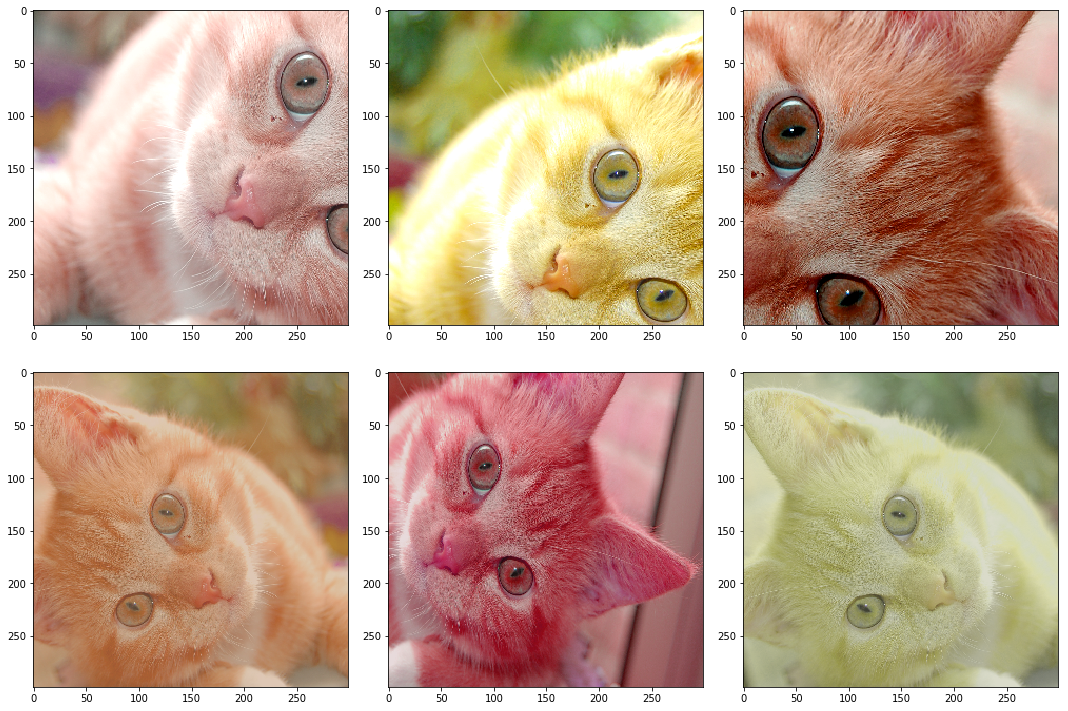

In [13]:
image_raw_data=tf.gfile.FastGFile('dataset/cat.jpg','rb').read()

with tf.Session() as sess:
    img_data=tf.image.decode_jpeg(image_raw_data)
    boxes=tf.constant([[[0.05,0.05,0.9,0.7],[0.35,0.47,0.5,0.56]]])
    plt.figure(figsize=(15,15))
    for i in range(6):
        result=preprocess_for_train(img_data,299,299,boxes)
        plt.subplot(3,3,i+1)
        plt.tight_layout()
        plt.imshow(result.eval())
    plt.show()